# IMPORT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
link_diabete = " https://raw.githubusercontent.com/MaskiVal/DataSets/main/diabetes.csv"

In [ ]:
df_diabete = pd.read_csv(link_diabete)
df_diabete

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Exploration

In [ ]:
df_diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df_diabete.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_diabete['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Remplacement des 0

In [ ]:
from scipy.stats import skew

In [ ]:
df_diabete['BloodPressure'][df_diabete['BloodPressure'] != 0].skew(axis = 0, skipna = True)

0.13415273171959258

In [ ]:
df_diabete['Glucose'][df_diabete['Glucose'] != 0].skew(axis = 0, skipna = True)

0.5309885349396284

In [ ]:
df_diabete['Insulin'][df_diabete['Insulin'] != 0].skew(axis = 0, skipna = True)

2.1664638438124424

In [ ]:
df_diabete['BMI'][df_diabete['BMI'] != 0].skew(axis = 0, skipna = True)

0.5939697505712674

In [ ]:
df_diabete['SkinThickness'][df_diabete['SkinThickness'] != 0].skew(axis = 0, skipna = True)

0.6906190139841921

In [ ]:
moyennes = df_diabete[df_diabete['Glucose'] != 0].groupby('Outcome')['Glucose'].mean()
df_diabete['Outcome'] = df_diabete['Outcome'].astype(float)
df_diabete['Glucose'] = df_diabete.apply(lambda row: moyennes[row['Outcome']] if row['Glucose'] == 0 else row['Glucose'], axis=1)

In [ ]:
moyennes = df_diabete[df_diabete['BloodPressure'] != 0].groupby('Outcome')['BloodPressure'].median()
df_diabete['BloodPressure'] = df_diabete.apply(lambda row: moyennes[row['Outcome']] if row['BloodPressure'] == 0 else row['BloodPressure'], axis=1)

In [ ]:
moyennes = df_diabete[df_diabete['Insulin'] != 0].groupby('Outcome')['Insulin'].mean()
df_diabete['Insulin'] = df_diabete.apply(lambda row: moyennes[row['Outcome']] if row['Insulin'] == 0 else row['Insulin'], axis=1)

In [ ]:
moyennes = df_diabete[df_diabete['BMI'] != 0].groupby('Outcome')['BMI'].mean()
df_diabete['BMI'] = df_diabete.apply(lambda row: moyennes[row['Outcome']] if row['BMI'] == 0 else row['BMI'], axis=1)

In [ ]:
moyennes = df_diabete[df_diabete['SkinThickness'] != 0].groupby('Outcome')['SkinThickness'].mean()
df_diabete['SkinThickness'] = df_diabete.apply(lambda row: moyennes[row['Outcome']] if row['SkinThickness'] == 0 else row['SkinThickness'], axis=1)

# Equilibrer le data set

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

In [ ]:
X = df_diabete[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [ ]:
Y = df_diabete['Outcome']

In [ ]:
ros = RandomOverSampler(random_state = 42)

In [ ]:
X_resampled, y_resampled = ros.fit_resample(X, Y)

In [ ]:
print(X_resampled)
print(y_resampled)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0           35.0  206.846154  33.6   
1              1     85.0           66.0           29.0  130.287879  26.6   
2              8    183.0           64.0           33.0  206.846154  23.3   
3              1     89.0           66.0           23.0   94.000000  28.1   
4              0    137.0           40.0           35.0  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
995            1    122.0           64.0           32.0  156.000000  35.1   
996            0    131.0           74.5           33.0  206.846154  43.2   
997            8    120.0           74.5           33.0  206.846154  30.0   
998            4    111.0           72.0           47.0  207.000000  37.1   
999           13    158.0          114.0           33.0  206.846154  42.3   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [ ]:
X_resampled['Outcome'] = y_resampled

In [ ]:
X_resampled['Outcome'].value_counts()

1.0    500
0.0    500
Name: Outcome, dtype: int64

In [ ]:
X_resampled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.115000,126.132890,73.141000,30.128729,169.194555,32.980857,0.482551,34.155000,0.50000
std,3.509714,30.862554,11.912663,8.757366,91.308600,6.891068,0.339166,11.602223,0.50025
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.00000
25%,1.000000,103.000000,66.000000,27.000000,130.287879,28.075000,0.247000,25.000000,0.00000
50%,3.000000,122.000000,74.000000,31.000000,144.000000,32.650000,0.378000,31.000000,0.50000
75%,7.000000,146.000000,80.000000,33.000000,206.846154,36.800000,0.645250,42.000000,1.00000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.00000


# Tests Kruskal-Wallis

In [ ]:
from scipy import stats
stats.kruskal(X_resampled['Pregnancies'][X_resampled['Outcome'] == 0], X_resampled['Pregnancies'][X_resampled['Outcome'] == 1])

KruskalResult(statistic=46.27216845279145, pvalue=1.0291550381662954e-11)

In [ ]:
stats.kruskal(X_resampled['Glucose'][X_resampled['Outcome'] == 0], X_resampled['Glucose'][X_resampled['Outcome'] == 1])

KruskalResult(statistic=260.31431972338567, pvalue=1.4655549416486395e-58)

In [ ]:
stats.kruskal(X_resampled['BloodPressure'][X_resampled['Outcome'] == 0], X_resampled['BloodPressure'][X_resampled['Outcome'] == 1])

KruskalResult(statistic=41.299768559015874, pvalue=1.3058435278428787e-10)

In [ ]:
stats.kruskal(X_resampled['SkinThickness'][X_resampled['Outcome'] == 0], X_resampled['SkinThickness'][X_resampled['Outcome'] == 1])

KruskalResult(statistic=154.58350518339785, pvalue=1.7266783316171686e-35)

In [ ]:
stats.kruskal(X_resampled['BMI'][X_resampled['Outcome'] == 0], X_resampled['BMI'][X_resampled['Outcome'] == 1])

KruskalResult(statistic=93.9124481581177, pvalue=3.297935052526534e-22)

In [ ]:
stats.kruskal(X_resampled['DiabetesPedigreeFunction'][X_resampled['Outcome'] == 0], X_resampled['DiabetesPedigreeFunction'][X_resampled['Outcome'] == 1])

KruskalResult(statistic=25.220458365330728, pvalue=5.113686307995407e-07)

In [ ]:
stats.kruskal(X_resampled['Age'][X_resampled['Outcome'] == 0], X_resampled['Age'][X_resampled['Outcome'] == 1])

KruskalResult(statistic=107.17765114178493, pvalue=4.070005939442307e-25)

In [ ]:
stats.kruskal(X_resampled['Insulin'][X_resampled['Outcome'] == 0], X_resampled['Insulin'][X_resampled['Outcome'] == 1])

KruskalResult(statistic=332.82231954814785, pvalue=2.333942747857814e-74)

Comme le test de Krustal-Wallis est très inférieur à 0.05 pour chacune des variables, on peut en toute confiance rejeter l'hypothèse nulle selon laquelle la médiane de chacune des variables est la même selon que le patient soit malade ou non.

# Distribution des données

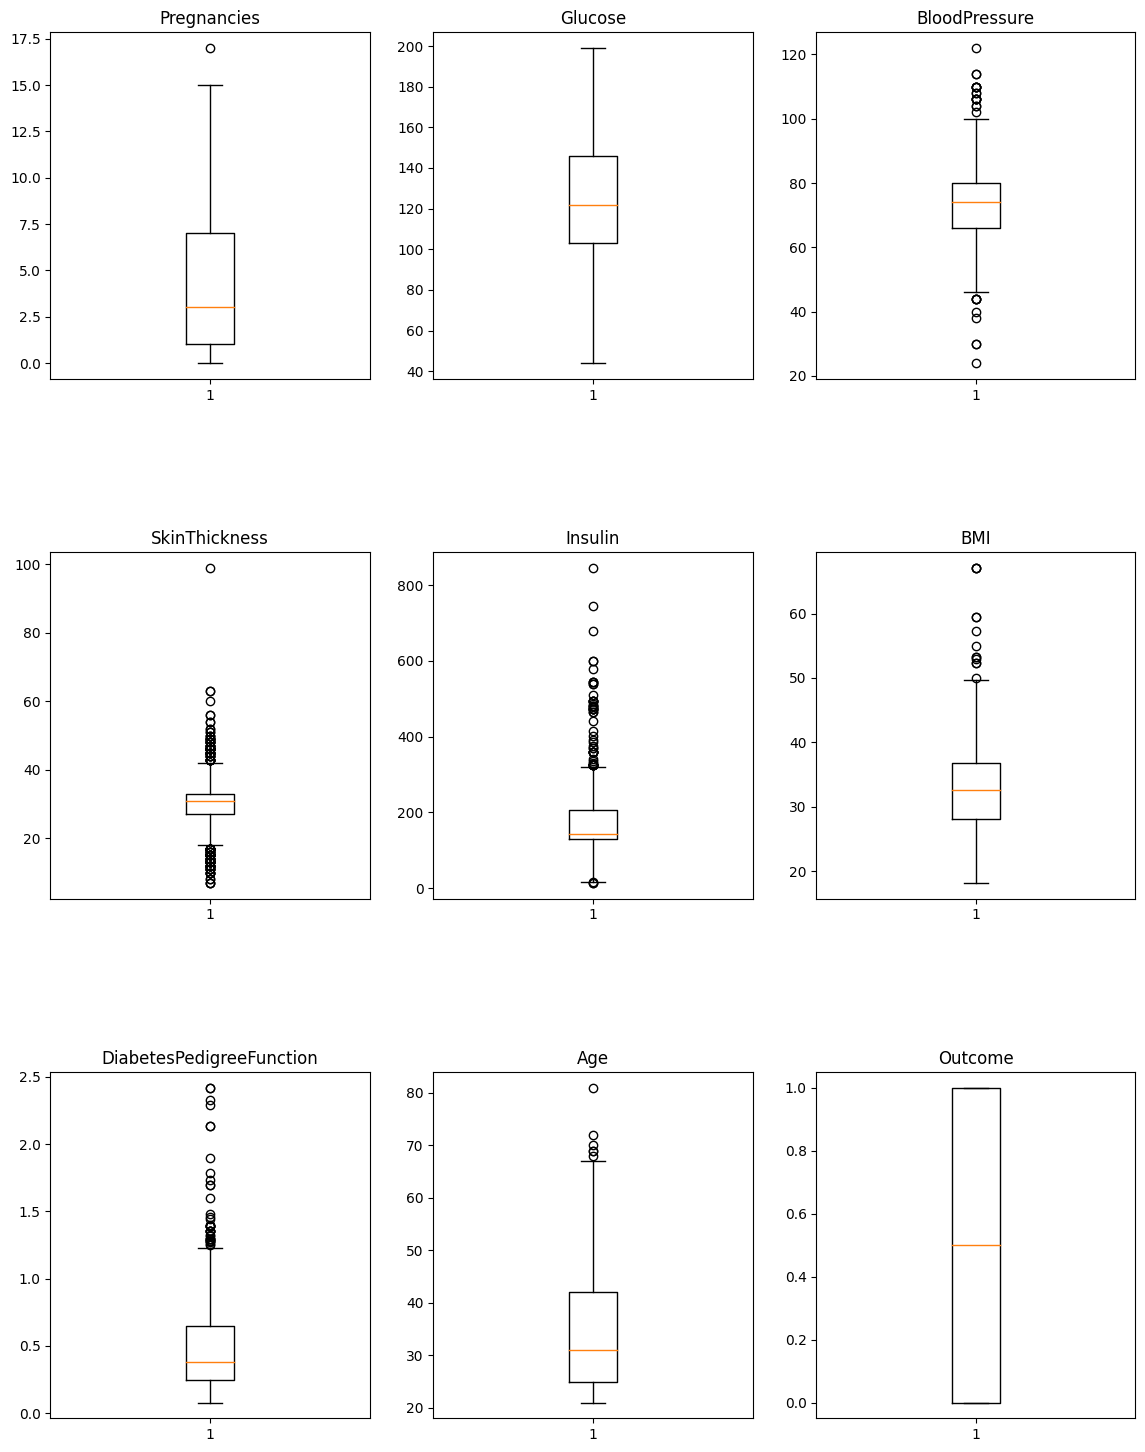

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(14, 18))
plt.subplots_adjust(hspace=0.5)

axes[0, 0].boxplot(X_resampled['Pregnancies'])
axes[0, 0].set_title('Pregnancies')

axes[0, 1].boxplot(X_resampled['Glucose'])
axes[0, 1].set_title('Glucose')

axes[0, 2].boxplot(X_resampled['BloodPressure'])
axes[0, 2].set_title('BloodPressure')

axes[1, 0].boxplot(X_resampled['SkinThickness'])
axes[1, 0].set_title('SkinThickness')

axes[1, 1].boxplot(X_resampled['Insulin'])
axes[1, 1].set_title('Insulin')

axes[1, 2].boxplot(X_resampled['BMI'])
axes[1, 2].set_title('BMI')

axes[2, 0].boxplot(X_resampled['DiabetesPedigreeFunction'])
axes[2, 0].set_title('DiabetesPedigreeFunction')

axes[2, 1].boxplot(X_resampled['Age'])
axes[2, 1].set_title('Age')

axes[2, 2].boxplot(X_resampled['Outcome'])
axes[2, 2].set_title('Outcome')

plt.show()

# Corrélations

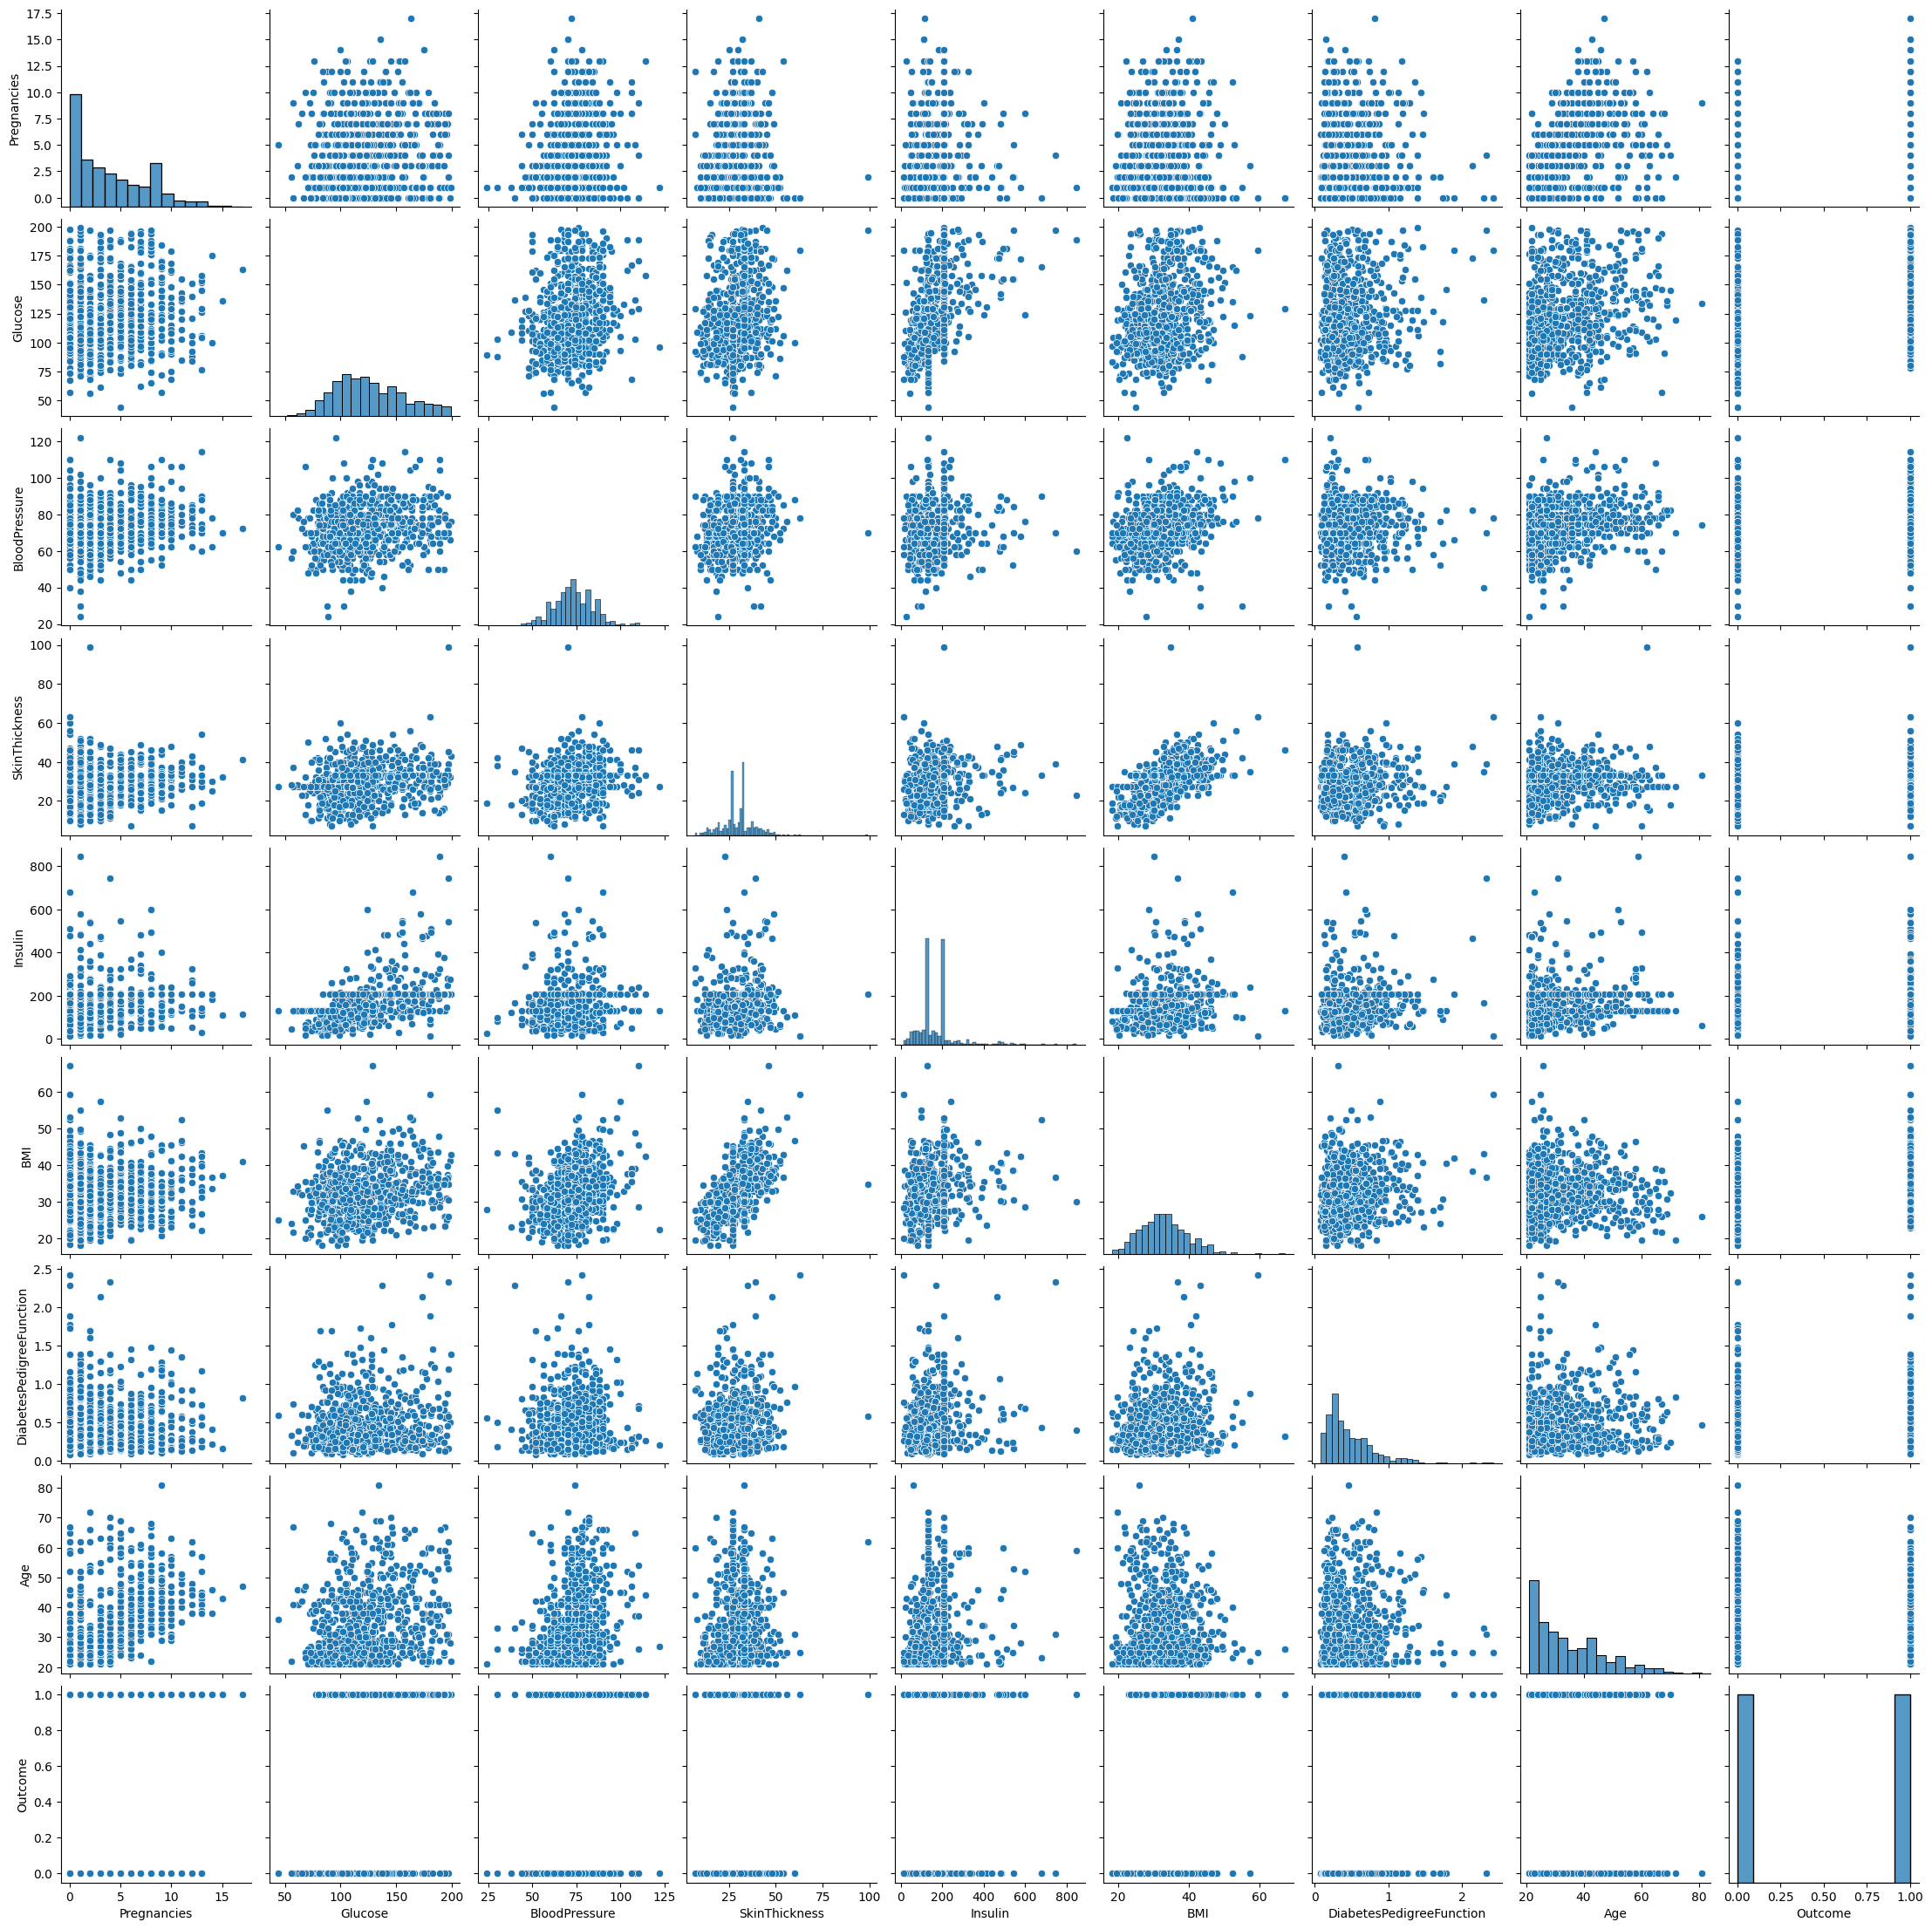

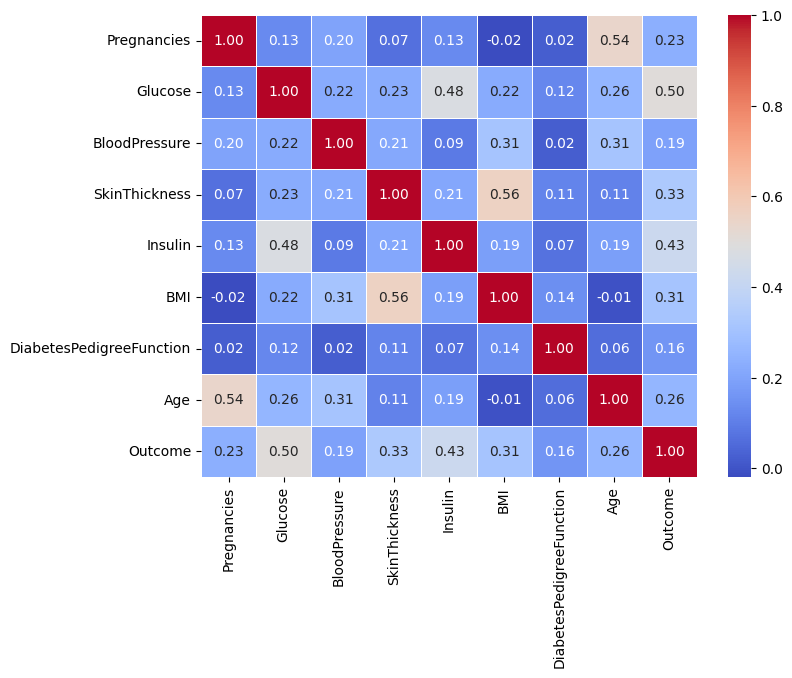

In [ ]:
sns.pairplot(X_resampled)
plt.show()
X_resampled_corr = X_resampled.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(X_resampled_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.show()

On constate en observant le tableau de corrélations qu'il n'existe pas de variables suffisamment corrélées entre elles pour justifier leur suppression éventuelle.

---



# Preprocessing ML

In [ ]:
pip install lightgbm

In [ ]:
from sklearn.model_selection import train_test_split
#pour les différents Scaler
from sklearn.preprocessing import MaxAbsScaler, QuantileTransformer, PowerTransformer, MinMaxScaler, StandardScaler, RobustScaler
#pour les différents modèles de ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

#pour les metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score

In [ ]:
df_diabete = X_resampled

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.1 MB/s eta

In [ ]:
from pycaret.classification import *
exp = setup(df_diabete, target='Outcome')

,Description,Value
0,Session id,5186
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(1000, 9)"
4,Transformed data shape,"(1000, 9)"
5,Transformed train set shape,"(700, 9)"
6,Transformed test set shape,"(300, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
df_diabete.to_csv('df_diabete.csv')

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9086,0.9708,0.9400,0.8859,0.9114,0.8171,0.8202,0.2410
gbc,Gradient Boosting Classifier,0.9086,0.9669,0.9200,0.9008,0.9097,0.8171,0.8186,0.3320
xgboost,Extreme Gradient Boosting,0.9086,0.9671,0.9371,0.8884,0.9115,0.8171,0.8197,0.2800
et,Extra Trees Classifier,0.9057,0.9691,0.9200,0.8958,0.9070,0.8114,0.8131,0.3710
lightgbm,Light Gradient Boosting Machine,0.9057,0.9713,0.9257,0.8924,0.9077,0.8114,0.8141,0.4220
dt,Decision Tree Classifier,0.9000,0.9000,0.9371,0.8752,0.9040,0.8000,0.8044,0.0290
ada,Ada Boost Classifier,0.8700,0.9417,0.8829,0.8622,0.8713,0.7400,0.7423,0.3570
knn,K Neighbors Classifier,0.8443,0.9215,0.8629,0.8334,0.8471,0.6886,0.6904,0.0440
lr,Logistic Regression,0.8071,0.8709,0.8000,0.8178,0.8058,0.6143,0.6188,0.6370
ridge,Ridge Classifier,0.7929,0.0000,0.7743,0.8102,0.7885,0.5857,0.5907,0.0270


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5186, verbose=0, warm_start=False)

In [ ]:
#listes

##liste des Scalers utilisés
list_scalers = [
    MaxAbsScaler(),
    QuantileTransformer(),
    PowerTransformer(),
    MinMaxScaler(),
    StandardScaler(),
    RobustScaler()
]
##liste des modèles utilisés
list_models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    LGBMClassifier(verbose=-1)
]

In [ ]:
X = df_diabete.drop('Outcome', axis = 1)
y = df_diabete['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Test de l'ensemble des modèles

In [ ]:
for model in list_models:
    print('__________________________')
    print(model.__class__.__name__)
    print('__________________________')
    print(' ')
    print('Paramètres du ML : ', model)
    print(' ')

    for scaler in list_scalers:
        print(f"=== {scaler.__class__.__name__} ===")
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)

        y_pred_test = model.predict(X_test_scaled)

        print('Accuracy score Train: ', model.score(X_train_scaled, y_train))
        print('Accuracy score Test: ', model.score(X_test_scaled, y_test))
        print('Recall Test: ', recall_score(y_test, y_pred_test))
        print('Overfitting : ', (model.score(X_train_scaled, y_train) - model.score(X_test_scaled, y_test)))


        confusion_mat = confusion_matrix(y_test, y_pred_test)
        matrice = pd.DataFrame(data = confusion_mat,
                 index = model.classes_ ,
                 columns = model.classes_)
        print(matrice)
        print(' ')

__________________________
KNeighborsClassifier
__________________________
 
Paramètres du ML :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
 
=== MaxAbsScaler ===
Accuracy score Train:  0.8613333333333333
Accuracy score Test:  0.828
Recall Test:  0.8968253968253969
Overfitting :  0.033333333333333326
     0.0  1.0
0.0   94   30
1.0   13  113
 
=== QuantileTransformer ===
Accuracy score Train:  0.8866666666666667
Accuracy score Test:  0.848
Recall Test:  0.8412698412698413
Overfitting :  0.03866666666666674
     0.0  1.0
0.0  106   18
1.0   20  106
 
=== PowerTransformer ===
Accuracy score Train:  0.8813333333333333
Accuracy score Test:  0.832
Recall Test:  0.873015873015873
Overfitting :  0.04933333333333334
     0.0  1.0
0.0   98   26
1.0   16  110
 
=== MinMaxScaler ===
Accuracy score Train:  0.8706666666666667
Accuracy score Test:  0.828
Rec

# Top 3 ML

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#double boucle
results = []
for model in list_models:

    for scaler in list_scalers:

        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)

        accuracy_train = model.score(X_train_scaled, y_train)
        accuracy_test = model.score(X_test_scaled, y_test)

        y_pred_test = model.predict(X_test_scaled)

        recall_test = recall_score(y_test, y_pred_test)

        overfitting = (model.score(X_train_scaled, y_train) - model.score(X_test_scaled, y_test))

        scores = cross_val_score(model, X_train_scaled, y_train, scoring='recall', cv=5)
        avg_scores = scores.mean()

        confusion_mat = confusion_matrix(y_test, y_pred_test)
        matrice = pd.DataFrame(data = confusion_mat,
                 index = model.classes_ ,
                 columns = model.classes_)
        results.append((model.__class__.__name__, scaler.__class__.__name__, accuracy_train, accuracy_test, recall_test, overfitting, avg_scores, matrice))

#tris de la liste results en fonction du recall_test
sorted_results = sorted(results, key=lambda x: x[6], reverse=True)

for model, scaler, accuracy_train, accuracy_test, recall_test, overfitting, avg_scores, matrice in sorted_results:
    print("___________________________")
    print(f"Model: {model}")
    print(f"Scaler: {scaler}")
    print(f"Avg scores - cross validation : {avg_scores}")
    print(f"Accuracy Train: {accuracy_train}")
    print(f"Accuracy Test: {accuracy_test}")
    print(f"Recall Test: {recall_test}")
    print(f"Overfitting: {overfitting}")
    print(matrice)

___________________________
Model: RandomForestClassifier
Scaler: MaxAbsScaler
Avg scores - cross validation : 0.9438198198198199
Accuracy Train: 1.0
Accuracy Test: 0.912
Recall Test: 0.9206349206349206
Overfitting: 0.08799999999999997
     0.0  1.0
0.0  112   12
1.0   10  116
___________________________
Model: RandomForestClassifier
Scaler: QuantileTransformer
Avg scores - cross validation : 0.9410450450450449
Accuracy Train: 1.0
Accuracy Test: 0.904
Recall Test: 0.9047619047619048
Overfitting: 0.09599999999999997
     0.0  1.0
0.0  112   12
1.0   12  114
___________________________
Model: LGBMClassifier
Scaler: PowerTransformer
Avg scores - cross validation : 0.9384144144144144
Accuracy Train: 1.0
Accuracy Test: 0.92
Recall Test: 0.9206349206349206
Overfitting: 0.07999999999999996
     0.0  1.0
0.0  114   10
1.0   10  116
___________________________
Model: RandomForestClassifier
Scaler: StandardScaler
Avg scores - cross validation : 0.9357477477477479
Accuracy Train: 1.0
Accuracy Tes

# Grid SearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
scaler = QuantileTransformer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
hyperparam = [{'n_estimators': [10, 15, 20, 25, 35, 50],
                'criterion' : ['gini', 'entropy', 'log_loss'],
                'max_features' : ['sqrt', 'log2', 'None'],
               'min_samples_leaf': [1, 2, 4, 6, 8, 16]}]

In [ ]:
grid = GridSearchCV(RandomForestClassifier(),
                    hyperparam,
                    cv = 5,
                    scoring = 'recall',
                    return_train_score = True)

In [ ]:
grid.fit(X_train_scaled, y_train)

In [ ]:
result = pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_score', ascending=False)

In [ ]:
result

In [ ]:
result.iloc[253].params

# Algorithme final

In [ ]:
modelRF = RandomForestClassifier(criterion ='entropy',
                                max_features = None,
                                min_samples_leaf= 1,
                                n_estimators= 15)

In [ ]:
modelRF.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=15, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = modelRF.predict(X_test_scaled)

In [ ]:
accuracy_score(y_pred, y_test)

0.904

In [ ]:
recall_score(y_pred, y_test)

0.9112903225806451

In [ ]:
scores = cross_val_score(modelRF, X_train_scaled, y_train, scoring='recall', cv=10)
avg_scores = scores.mean()

In [ ]:
scores1 = cross_val_score(modelRF, X_train_scaled, y_train, scoring='accuracy', cv=10)
avg_scores1 = scores1.mean()

In [ ]:
avg_scores1

0.9186666666666667

In [ ]:
avg_scores

0.9517780938833569

# Shap

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
X_test_shape = pd.DataFrame(X_test_scaled, columns=list(X_test.columns))
X_train_shape = pd.DataFrame(X_train_scaled, columns=list(X_train.columns))

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
X_test_shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.000000,0.023256,0.428571,0.285714,-0.189398,0.056818,-0.197128,-0.235294
1,0.833333,-1.348837,-0.142857,-1.142857,-0.185638,-0.079545,0.573107,0.705882
2,1.333333,-0.069767,0.428571,0.857143,0.071841,1.090909,1.056136,1.058824
3,1.166667,0.906977,0.714286,-0.537792,-0.185638,-0.568182,-0.518277,1.411765
4,-0.333333,-0.255814,-0.142857,-0.142857,0.411451,0.193182,0.385117,-0.294118
...,...,...,...,...,...,...,...,...
245,-0.500000,-0.651163,0.785714,-0.857143,-1.417221,0.534091,-0.348564,-0.352941
246,-0.166667,-0.558140,-0.285714,-0.537792,-0.185638,-1.193182,-0.711488,-0.411765
247,0.333333,-0.651163,-0.142857,0.285714,-0.185638,0.568182,-0.027415,-0.176471
248,0.333333,0.325581,2.428571,0.285714,0.814362,1.829545,-0.400783,0.411765


In [ ]:
import shap

In [ ]:
explainer = shap.KernelExplainer(rfc.predict,shap.sample(X_test_shape,100))

In [ ]:
shap_values = explainer.shap_values(X_test_shape,nsamples=100)

  0%|          | 0/250 [00:00<?, ?it/s]

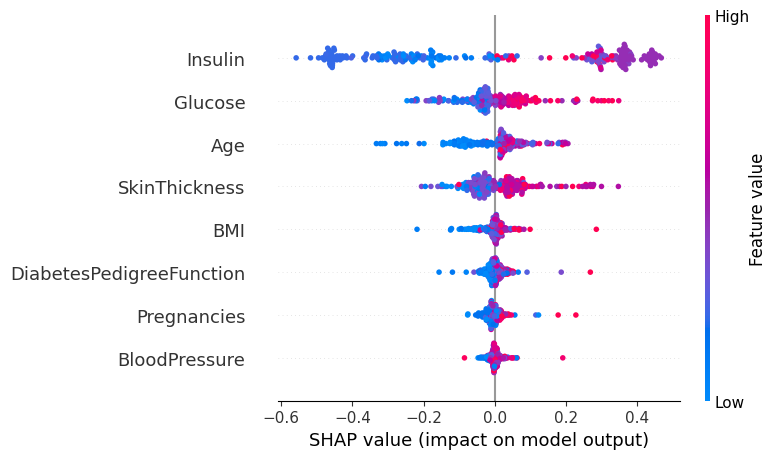

In [ ]:
shap.summary_plot(shap_values,X_test_shape)

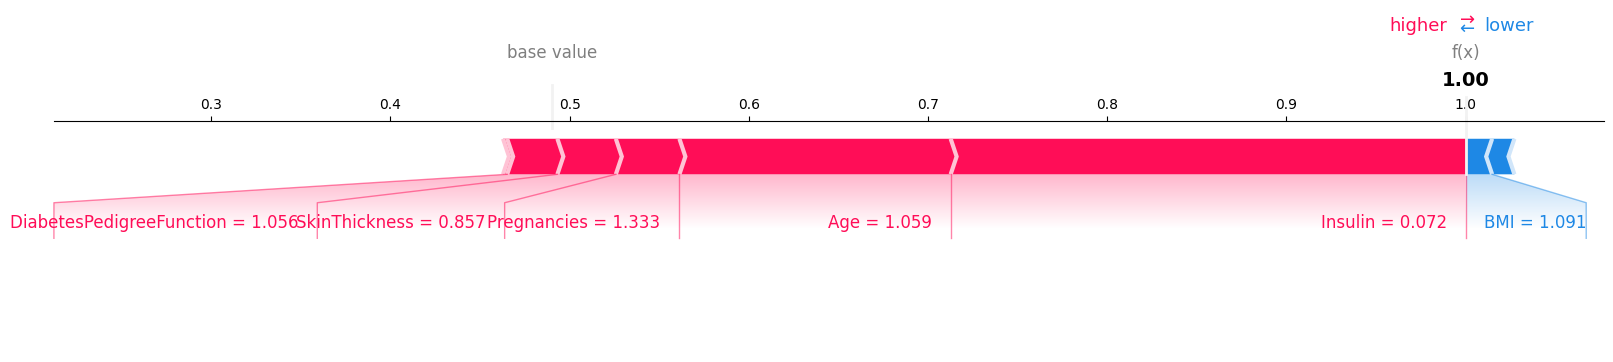

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.initjs()
num_test = 2
shap.force_plot(explainer.expected_value, shap_values[num_test,:], X_test_scaled[num_test,:].round(3), feature_names=X.columns, matplotlib=True, show=True)
plt.savefig('force_plot.png')

#Lasso

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
reg = LassoCV()
reg.fit(X_train_scaled, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [ ]:
print("Best score using built-in LassoCV: %f" %reg.score(X_train_scaled,y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best score using built-in LassoCV: 0.460663
Lasso picked 8 variables and eliminated the other 0 variables


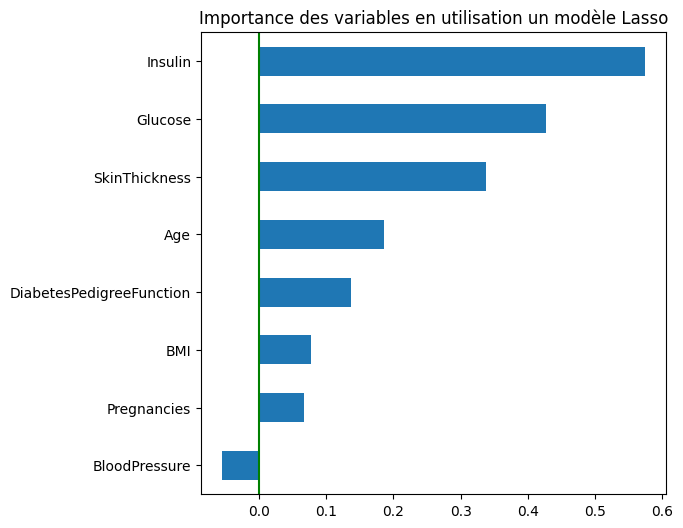

In [ ]:
fig = plt.figure(figsize=(6,6))
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.axvline(x=0, color='g')
plt.title("Importance des variables en utilisation un modèle Lasso")
fig.savefig('importance_graph.png', dpi=200, bbox_inches = 'tight') ;